# 1. Introduction
This notebook serves as an educational resource for understanding and implementing linear regression, one of the foundational algorithms in statistical modeling and machine learning. We'll explore simple and multivariate linear regression, showcasing the process from data preparation to model evaluation.

# 2. Download the dataset

In [1]:
# Import all needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pylab as pl

In [2]:
import requests

# File URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
filename = "FuelConsumption.csv"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"File downloaded successfully as {filename}")
else:
    print("Failed to download the file.")
    
df = pd.read_csv("FuelConsumption.csv")

File downloaded successfully as FuelConsumption.csv


In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 3. Data Exploration
Let's have a descriptive exploration on the data.

In [4]:
# Get a quick summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# Summarise the numerical data we will work with
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# Subset four predictor variables ENIGNESIZE, CYLINDERS, FUELCOMSUMPTION_COMB and the response variable CO2EMISSIONS
variables = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
variables.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


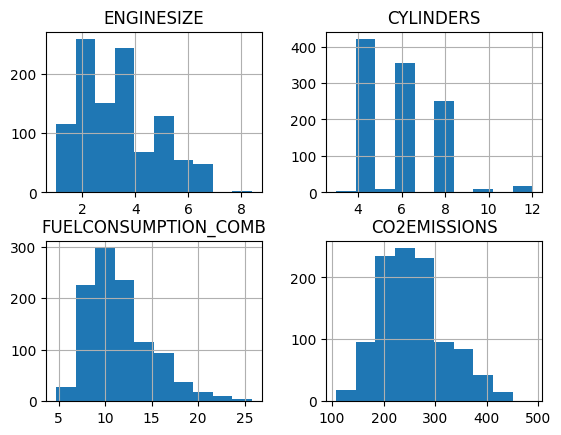

In [7]:
# Check the distribution of each dependent and independent values 
variables.hist()
plt.show()

In [8]:
# Checking the columns for missing values
variables.isna().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

Next, we plot the features against the target variable CO2EMISSIONS to visualise strenght and direction of the linear relationship.

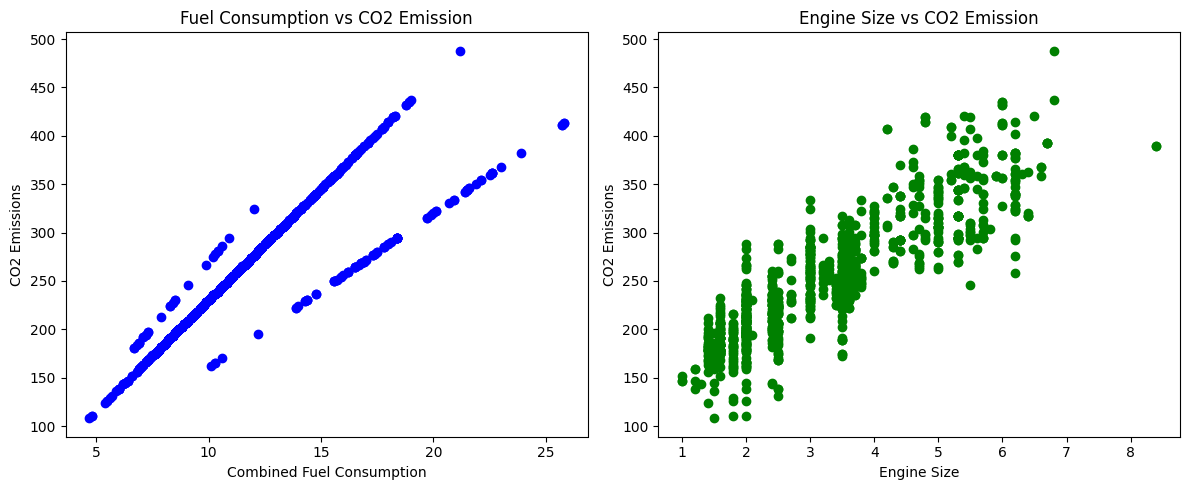

In [9]:
# Plot a scatterplot to visualise the relationship between two variables
fig, axes = plt.subplots(1, 2, figsize=(12,5)) # Create 1 row and 2 columns of subplots
# First scatter plot: Fuel Consumption vs CO2 Emissions
axes[0].scatter(variables.FUELCONSUMPTION_COMB, variables.CO2EMISSIONS, color='blue')
axes[0].set_xlabel("Combined Fuel Consumption")
axes[0].set_ylabel("CO2 Emissions")
axes[0].set_title("Fuel Consumption vs CO2 Emission")
# Second scatter plot: Engine Size vs CO2 Emissions
axes[1].scatter(variables.ENGINESIZE, variables.CO2EMISSIONS, color='green')
axes[1].set_xlabel("Engine Size")
axes[1].set_ylabel("CO2 Emissions")
axes[1].set_title("Engine Size vs CO2 Emission")
# Adjust layout and show
plt.tight_layout()
plt.show()

# 4. Data Modelling
## 4.1 Creating a train and test dataset
<p>Train/ Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model.</p>
We cerate a mask to select random rows using <b>np.random.rand()</b> to split it into a train and test set. 80% of the entire dataset will be used for training and 20% for testing.

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = variables[msk]
test = variables[~msk]

## 4.2 Simple Regression Model
<p>Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.</p>

First, let's confirm the train dataset has a linear relationship so it eligible for a Simple Regression Model.

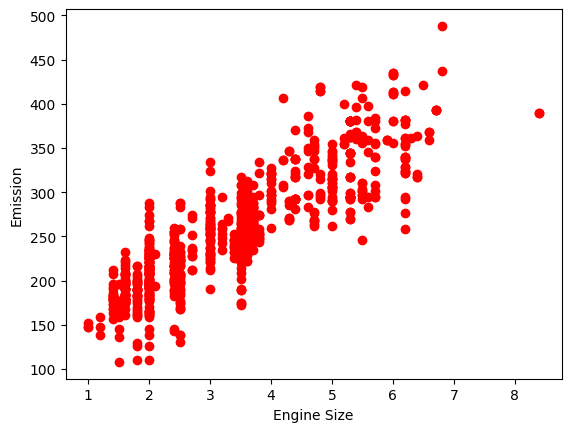

In [11]:
# Visualise the train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

Next, we model a Simple Linear Regression using the sklearn package to model the data. We select the predictor 'ENGINESIZE' to predict the target variable 'CO2EMISSIONS'.

In [12]:
# Create a Linear Regression and mask the values of our predictor and target variable
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Fit the model
regr.fit(train_x, train_y)
# The Coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)


Coefficients:  [[39.31185206]]
Intercept:  [124.45994276]


<p><b>Coefficient</b> and <b>Intercept</b> in Simple Linear Regression are the parameters of the fit line.</p>
We can plot the fit line over the data.

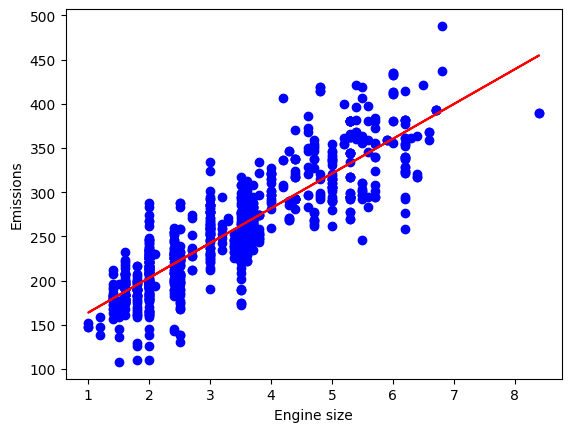

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

## 4.3 SLR Evaluation
We compare the actual and predicted values to calculcate the accuracy of a regression model. Model Evaluation Metrics provide insights to areas that require improvement.

There are different model evaluation metrics:
1. <b>Mean Absolute Error</b>: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it's just average error.

2. <b>Mean Squared Error (MSE)</b>: Is the mean of the squared error, which is more popular as it focuses more towards large errrs. (This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.)
3. <b>R-squared</b>: Is a metric to measure the performance of a regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits the data. (The best possible score is 1.0 and it can be negative.) 

In [14]:
# Compute all three evaluation methods/metrics
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_- test_y)))
print("Residual sum of sqaured (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 19.62
Residual sum of sqaured (MSE): 715.28
R2-score: 0.80


The below visualisation shows how well the predicted values align with the actual values.

- The Red Line represents the ideal scenario where predictions perfectly match actual values.
- The Deviations indicate prediction errors, which relate to MSE

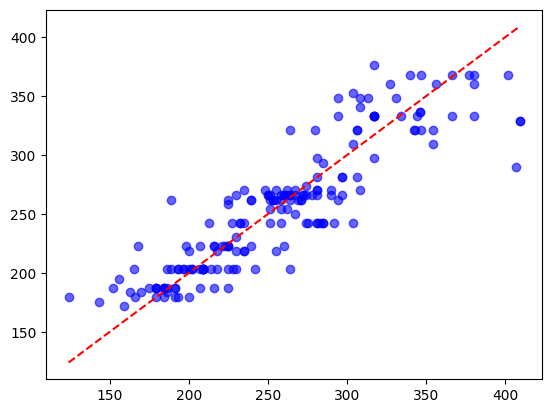

In [15]:
# Visual representation of the SLR Evaluation metrics
plt.scatter(test_y, test_y_, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--')
plt.show()

Since multiple features influence the CO2-Emission of a car, it might not be enough to perform a Simple Linear Regression for a proper prediction. We will try to predict continuous CO2-Emission values performing a Multiple Linear Regression onto our dataset. 

# 4.4 Multiple Linear Regression Model

When more than one independent variable is present, the process is called Multiple Linear Regression. This section will focus on the predciction of CO2EMISSIONS using the three independent variables ENGINESIZE, CYLINDERS and FUELCONSUMPTION_COMB.

In [16]:
# Overview of the features
variables.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [17]:
# Fitting a Multiple Regression Model
regr = LinearRegression()
x = np.asanyarray(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(df[['CO2EMISSIONS']])
regr.fit(x, y)
# Check the coefficients
print("Coefficients: ", regr.coef_)

Coefficients:  [[10.85524041  7.51622501  9.59563161]]


Again, the <b>Coefficient</b> and <b>Intercept</b> are the parameters of the fitted line.

<b>Ordinary Least Squares (OLS)</b> is a method for estimating the unknown parameters in a linear regression model. It chooses the parameters of a linear function of a set of explanatory variables by minimising the sum of squares of the differences between the target dependent variable and those predicted by the linear function. It tries to minimise the sum of squared errors or mean squared error between the target variables (y) and the predicted output ($\hat{y}$) over all samples in the dataset.

In [18]:
# 4.5 Multiple Linear Regression Prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test_x)
print("Mean Squared Error (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
# 1 is the perfect Variance score for the perfect prediction
print("Variance score: %.2f" % regr.score(test_x, test_y))
print("R2-score: %.2f" % r2_score(test_y, y_hat))

Mean Squared Error (MSE): 458.38
Variance score: 0.87
R2-score: 0.87


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.

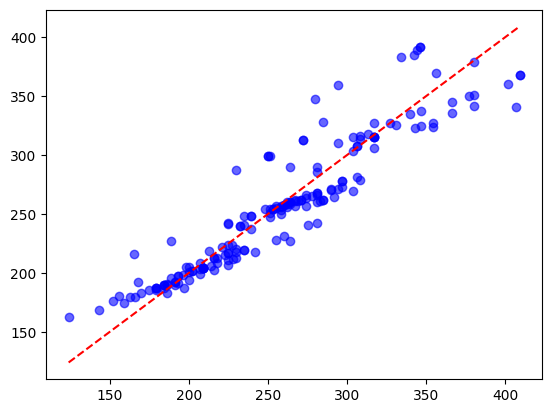

In [19]:
# Visual representation of the MLR Evaluation metrics
plt.scatter(test_y, y_hat, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--')
plt.show()

In [20]:
# 5. SLR vs MLR Evaluation Results
# SLR evaluation results
print("Results of our Simple Linear Regression:")
print("Mean Squared Error of the SLR: %.2f" % np.mean((test_y_ - test_y) ** 2)) # Smaller value is better
print("R2-score of the SLR: %.2f" % r2_score(test_y, test_y_)) # Value 1 equals perfect prediction
# MLR evaulation results
print("\nResults of our Multiple Linear Regression:")
print("Mean Squared Error of the MLR: %.2f" % np.mean((y_hat - test_y) ** 2)) 
print("R2-score of the MLR: %.2f" % r2_score(test_y, y_hat))

Results of our Simple Linear Regression:
Mean Squared Error of the SLR: 715.28
R2-score of the SLR: 0.80

Results of our Multiple Linear Regression:
Mean Squared Error of the MLR: 458.38
R2-score of the MLR: 0.87


As expected, the Multiple Linear Regression Model performed better than Simple Linear Regression as the extended feature-set made it easier to predict more accurate CO2-Emission values.